In [1]:
# import statistical tools
from __future__ import print_function
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [2]:
# import data visualisation tools
import matplotlib.pyplot as plt
from matplotlib import pylab
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline

In [3]:
# import and view first 10 items of file
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Auto.csv"
Auto = pd.read_csv(url)
print(Auto.head())
print(list(Auto))
Auto = Auto.drop(Auto.index[[32, 126, 330, 336, 354]]) # removing rows containing "?". This is the easy way out. Such missing values need to be explored first in a real life situation.

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']


In [4]:
# run regression (I am not visualising the data for the sake of brevity. But it is highly recommended as first step afer importing data)
Y = Auto.mpg.astype(float)
X = Auto.horsepower.astype(float)
model = ols("Y ~ X", data = Auto).fit()
print(model.summary())
print()
values = slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           7.03e-81
Time:                        17:48:56   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [5]:
X1 = Auto[['horsepower']]
Y1 = Auto['mpg']
lm = LinearRegression().fit(X1, Y1)
print("Coefficients: ", lm.coef_)
print("Intercepts: ", lm.intercept_)
Y2 = [[98]]
predictions = lm.predict(Y2)
print("Predicted value at X = 98: ", predictions)

Coefficients:  [-0.15784473]
Intercepts:  39.93586102117047
Predicted value at X = 98:  [24.46707715]


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



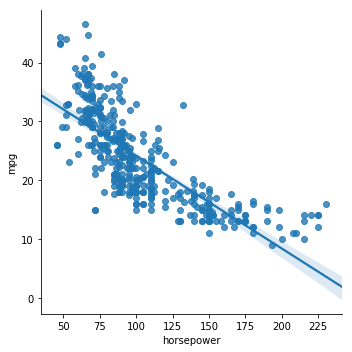

In [6]:
# plot relationships
plotdata = pd.concat([X, Y], axis = 1)
sns.lmplot(x = "horsepower", y = "mpg", data = plotdata)

In [7]:
"""
a.i. Given the F-Statistic > 1 and p-value of that F-Statistic is close to 0 (and << 0.005), there is a statistically significant
   relationship between mpg and horespower.
a.ii. To determine the strength of the relationship between the predictor (horsepower) and response (mpg), we need to calculate the ratio of 
   the RSE of the predictor (as determined by the model) and the mean of the response, since it would show how strongly it actually predicts
   the true values of the response. (Another way would be to show R^2 since it would determine how much the regressed model actually explains
   the true values of the response). The RSE is 4.905757 and the mean of mpg is 23.445918, which means the percentage error is 20.923714%. The R^2 value is 0.795 or 79.5%.
a.iii. Negative relationship. An increase in horsepower is related to a decrease in mpg. See graph <Auto_mpg_hp - Predicted.png>
a.iv. 24.46707715
b. <mpg~horsepower.png>
"""

'\na.i. Given the F-Statistic > 1 and p-value of that F-Statistic is close to 0 (and << 0.005), there is a statistically significant\n   relationship between mpg and horespower.\na.ii. To determine the strength of the relationship between the predictor (horsepower) and response (mpg), we need to calculate the ratio of \n   the RSE of the predictor (as determined by the model) and the mean of the response, since it would show how strongly it actually predicts\n   the true values of the response. (Another way would be to show R^2 since it would determine how much the regressed model actually explains\n   the true values of the response). The RSE is 4.905757 and the mean of mpg is 23.445918, which means the percentage error is 20.923714%. The R^2 value is 0.795 or 79.5%.\na.iii. Negative relationship. An increase in horsepower is related to a decrease in mpg. See graph <Auto_mpg_hp - Predicted.png>\na.iv. 24.46707715\nb. <mpg~horsepower.png>\n'